# Analysis of detector hits from URANOS output

The is an example script to read and plot URANOS output from a physical detector of a single scenario to examine each individual neutron.

*-- last modified: June 29, 2022*

In [1]:
# import the URANOS class which can deal with all the details on its own
from lib.uranos import URANOS

## 0. TL;DR
This tutorial uses only a few short-hand functions to read in URANOS output. Here is the compacted list without explanations. Jump to the next section go through the more elaborate tutorial.

In [ ]:
U = URANOS(folder='example_uranos_output/complex_fields/')
U = U.read_hits().only_soil_contact().drop_multicounts()
U = U.weight_by_detector_response(method='1/sqrt(E)')
U.plot_xy_hits()
U.plot_z_hits()
U.footprint_by_hits('r')
U.depth_distribution(var='z_max')
U.plot_angle_of_origin(polar=True)

## 1. Setup the URANOS object
Assuming that you have all the URANOS output files in one folder, the URANOS class can automatically recognize the detector hits file based on its name. Hence, to initialize the object, it is sufficient to provide only the folder name. Other options for initialization are:
- `folder` - folder which contains the density maps, origin files, png image, etc.
- `scaling=2` - one pixel of the matrix corresponds to how many meters? Defaults to 2, i.e., a 500x500 matrix represents a 1000x1000 m² area
- `default_material` - dominant material that is used as region number 0. If not provided, tries to guess the dominant material of the environment by looking at the central pixel (0,0).
- `hum=5, press=1013` - air humidity (g/m³) and air pressure (hPa) used in the simulation, will be used for further internal calculations.

In [4]:
# Create URANOS object based on the given folder
U = URANOS(folder='example_uranos_output/complex_fields/')

Now read the file (defaults to 'detectorNeutronHitData.dat') containing all the neutrons which got detected by the central detector. Since we are only interested in neutrons with soil contact and we want to count each wandering neutron only once, we also filter the data right away.

In [5]:
# Filters only neutrons with soil contact = 1 and z > 0 
# Drop duplicate counts
U = U.read_hits().only_soil_contact().drop_multicounts()

In [6]:
# This is how the neutron hits DataFrame looks like:
U.Hits

,Detector_ID,Neutron_Number,Number_of_Scatterings,previous_x_[m],previous_y_[m],previous_Depth_[m],Nadir_Angle,Azimuth_Angle,Energy_[MeV],Energy_at_Interface_[MeV],...,z_max,w,w_deg,r,ex,ey,we,we_deg,thermal,E
1,0,682,9,-4.371410,-4.599530,0.000230,1.927520,0.324362,4.571360e-03,0.026286,...,0.022287,0.809177,46.371161,6.359620,-4.371410,-4.599530,0.810229,46.431450,False,4.571360e-03
3,0,2116,22,5.101920,-2.164070,-1.283670,2.154820,0.057975,1.998820e-04,0.390889,...,0.102047,5.822256,333.653657,123.119338,5.101920,-2.164070,2.739834,157.010572,False,1.998820e-04
4,0,2172,11,6.895720,-164.442000,-38.932500,1.345230,1.611920,1.664730e+00,7.265390,...,0.257619,1.615644,92.587035,104.130486,6.895720,-164.442000,1.612113,92.384709,False,1.664730e+00
8,0,6314,124,-0.677972,-1.807670,0.014190,2.547390,1.588190,4.521840e-08,0.000061,...,0.064600,0.115996,6.647337,8.197199,-0.677972,-1.807670,1.211387,69.420434,True,4.521840e-08
9,0,7833,88,-3.117840,3.310980,-10.866000,0.672674,4.357110,1.395720e-06,4.048640,...,0.169964,4.328624,248.058705,247.172069,-3.117840,3.310980,5.467161,313.304337,False,1.395720e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32752,0,6756697,11,-1.504930,-4.331230,-2.069170,0.854125,1.925750,1.150730e+00,2.791780,...,0.221589,1.747503,100.143467,14.431739,-1.504930,-4.331230,1.235793,70.819099,False,1.150730e+00
32755,0,6842295,56,-7.427720,-1.197230,-1.827880,2.004260,1.970590,2.168540e-08,0.464098,...,0.091649,2.350970,134.726065,62.925259,-7.427720,-1.197230,0.159217,9.124177,True,2.168540e-08
32758,0,6758037,129,3.417700,12.017900,-0.271267,1.746050,5.043880,2.213410e-08,2.983110,...,0.129118,3.952795,226.521228,415.141357,3.417700,12.017900,4.434727,254.139076,True,2.213410e-08
32763,0,7654156,25,0.243426,0.357437,0.010767,2.445660,0.011907,7.437630e-03,0.135352,...,0.047903,1.567475,89.826666,72.545970,0.243426,0.357437,4.113914,235.754406,False,7.437630e-03


As seen above, the initialization already prepares useful short-hand columns for certain variables:
- `x` - equals 'x_at_interface_[m]' (first soil contact)
- `y` - equals 'y_at_Interface_[m]' (first soil contact)
- `z` - equals 'z_at_Interface_[m]' (first soil contact)
- `z_max` - equals 'maximum_Depth_[m]'
- `w` - angle of origin: `np.arctan2(y, x) + 3.141`
- `w_deg` - w in degrees
- `r` -  Distance to origin: `np.sqrt(x**2 + y**2)`
- `ex` - equals 'previous_x_[m]' (last position before detection)
- `ey` - equals 'previous_y_[m]' (last position before detection)
- `we` - angle of entry
- `we_deg` - we in degrees
- `E` - equals 'Energy_[MeV]'
- `thermal` - thermal neutron flag, `E < 0.5e-6`

## 2. Energy weighting
Depending on the detector and the URANOS configuration used, the detected neutrons might need to be weighted by their probability to get detected by a real detector. This can be done by a realistic detector response function, or a assuming the standaed $1/\sqrt{E}$ weighting for bare counters.

Function `U.weight_by_detector_response(method, file)` with the options:
- `method='1/sqrt(E)'` - standard 1/sqrt(E) weighting for bare counters
- `method='drf'` - use a detector response function, specify a file
- `file` - csv file that contains two columns: Energy and Weight.

In [7]:
U = U.weight_by_detector_response(method='1/sqrt(E)')

How relevant is the weighting for the data analysis? Well, since detectors have a certain probability to detect neutrons of a certain energy, not every neutron count has an equal value in the final results. 
Here is an example: *How many neutrons are detected within 10 m distance?*

In [8]:
# How many neutrons are detected within 10 m distance?
r10m = U.Hits[U.Hits.r < 10]
len(r10m)/len(U.Hits) # => 39 %

0.38968158606188047

In [9]:
# More realistic: weight by the probability to be counted
# (i.e., weighted by the detector energy response)
r10m.Weight.sum() # => 29 %

0.2968760136981589

## 3. Spatial Plots
Let's look at the neutron origins from the birds-eye view, where do the neutrons come from? The following functions have the same argument list with the following options:
- `ax=None` - uses a given axis to plot on a subpanel of an overarching figure, or create an own figure
- `thermal=False` - consider thermal or epithermal neutrons, defaults to epithermal
- `footprint=True` - indicate the footprint ellipse
- `quantile=0.865` - quantile definition for the footprint
- `weighted=True` - use energy-weighted neutrons

Notes:

- All plotting routines return an `ax` object which can be used to make further changes to the plot. 
- If you need to save the plot, use: `ax.figure.savefig('my_plot.pdf', bbox_inches="tight")`

<AxesSubplot:xlabel='x (in m)', ylabel='y (in m)'>

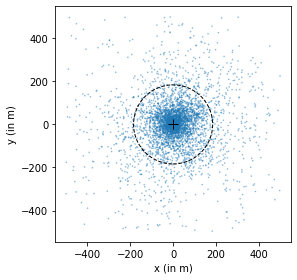

In [10]:
# XY Plot with origins and footprint
U.plot_xy_hits()

<AxesSubplot:xlabel='x (in m)', ylabel='Depth z (in m)'>

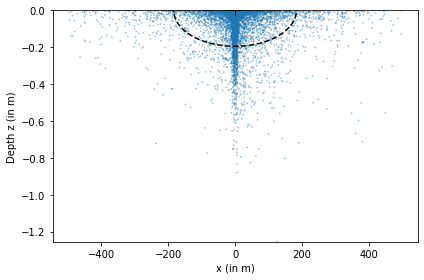

In [11]:
# Z Plot with origins and footprint
# Suggestion: use ax = ... above and ax.set_xlim(-10,10) to zoom in.
U.plot_z_hits()

## 4. Distance and Depth distribution
Let's look at the distance and depth distribution

<AxesSubplot:xlabel='r (in m)', ylabel='Frequency'>

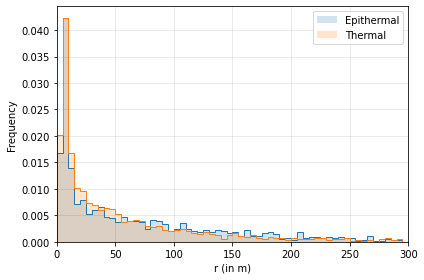

In [12]:
# Distance distribtion
U.distance_distribution(var='r')

<AxesSubplot:xlabel='z (in m)', ylabel='Frequency'>

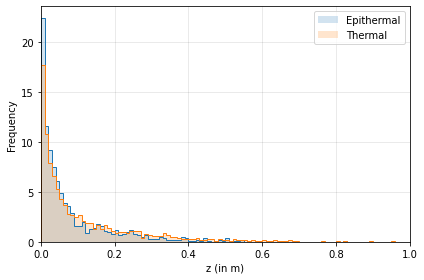

In [13]:
# Distribution of depth of first contact in the soil
U.depth_distribution(var='z')

<AxesSubplot:xlabel='z_max (in m)', ylabel='Frequency'>

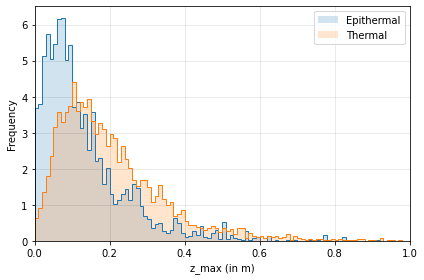

In [15]:
# Distribution of maximum depth in the soil
U.depth_distribution(var='z_max')

## 5. Footprint
The footprint can be calculated by counting the number of (weighted) neutrons per distance travelled, the footprint radius then is the distance within which 86.5% of all detected neutrons have originated.

In [16]:
U.footprint_by_hits('r')

183.60076538511487

In [17]:
# Can also be calculated for thermal neutrons, while there is a debate on how this footprint should be calculated (see Jakobi et al. 2021 and Rasche et al. 2021).
U.footprint_by_hits('r', thermal=True)

144.1234183918769

In [18]:
# The peneration depth calculation is not trivial. The following calculations only indicate the possible range of penetration. Refer to Markus Köhli for details.
print('z_86 = {z:.3f} m, zmax_86 = {zmax:.3f} m' 
      .format(z   =U.footprint_by_hits('z'),
              zmax=U.footprint_by_hits('z_max')))

z_86 = 0.195 m, zmax_86 = 0.252 m


## 6. Angular distribution
When looking at every single neutron that hit the detector, we can also calculate the angle from which the neutrons originated. The following plot shows the angles for four different distances of origin to answer the question whether long-range and short-range neutrons have the same angular distribution. For an application, see e.g., Francke et al. 2021.

<AxesSubplot:title={'center':'Angle of origin'}, xlabel='Angle of origin of detected neutrons (°)', ylabel='Histogram (fraction of total counts)'>

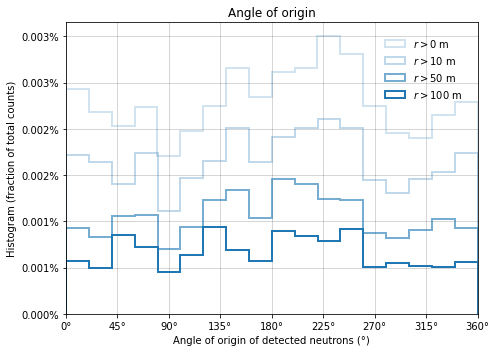

In [19]:
# Angular distribution
U.plot_angle_of_origin()

<PolarAxesSubplot:title={'center':'Intensity relative to the total ring intensity (in %)'}>

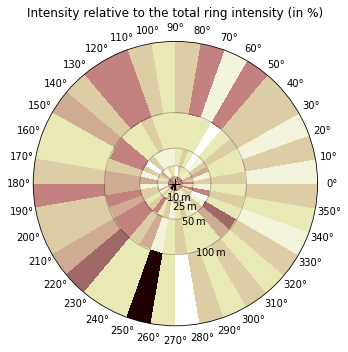

In [20]:
# Angular distribution in polar coordinates
U.plot_angle_of_origin(polar=True)